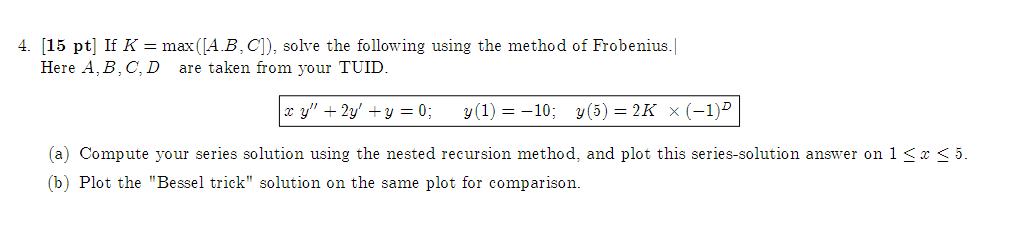

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special

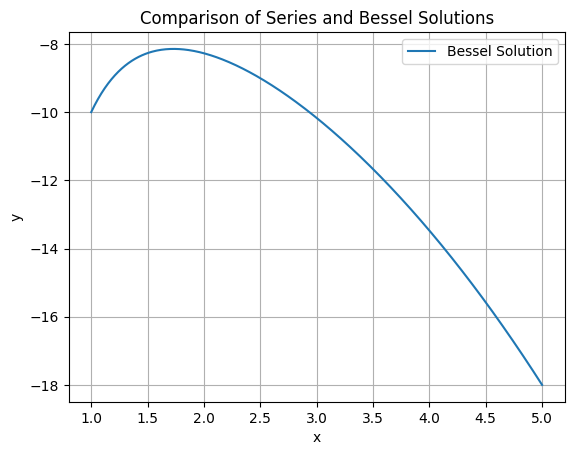

In [4]:
# Define u1 and u2 using Bessel functions
u1 = lambda x: 1/math.sqrt(x) * scipy.special.i0(2 * np.sqrt(x))  # Modified Bessel function of the first kind
u2 = lambda x: 1/math.sqrt(x) * scipy.special.k0(2 * np.sqrt(x))  # Modified Bessel function of the second kind

# Compute u1 and u2 at given boundary points (1 and 5)
u1_values = [u1(1), u1(5)]
u2_values = [u2(1), u2(5)]

# Solve the system of equations to determine coefficients using boundary conditions
CC = np.linalg.solve(np.array([[u1_values[0], u2_values[0]], [u1_values[1], u2_values[1]]]), np.array([-10, -18]))

# Define the solution using Bessel
def bessel_trick(x):
    return CC[0] * u1(x) + CC[1] * u2(x)  # Linear combination of the Bessel solutions

# Define the series solution to the differential equation using Frobenius method
# def series(x, N=50):
# Define the x values for plotting the solutions
x = np.linspace(1, 5, 400)

# Compute the series and Bessel solutions for the given x values
# y_vals_series = [series(val) for val in x]
y_vals_bessel = [bessel_trick(val) for val in x]

# Plotting the results
plt.figure()
# plt.plot(x, y_vals_series, label="Series Solution")
plt.plot(x, y_vals_bessel, label="Bessel Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Series and Bessel Solutions")
plt.grid(True)
plt.show()